In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishjangra27/face-mask-12k-images-dataset")

print("Path to dataset files:", path)

100%|██████████| 330M/330M [00:05<00:00, 61.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Unavailable!


In [7]:
train_dir = "/root/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Train"
test_dir = "/root/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Test"
valid_dir = "/root/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Validation"

In [8]:
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['WithoutMask', 'WithMask']


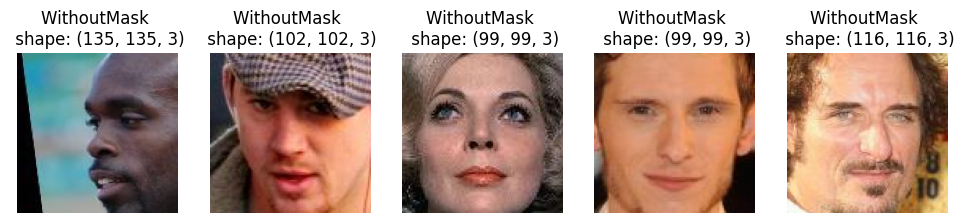

In [9]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

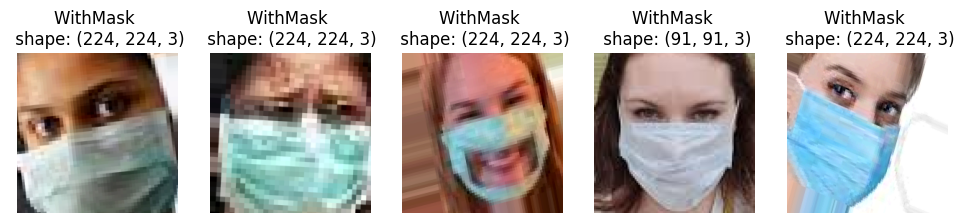

In [10]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [24]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32 # there will be 32 images in a batch!

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # 🔥 this gives one-hot encoded labels
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
)


Found 8000 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [25]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['WithMask', 'WithoutMask']


In [26]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 👈 2-class softmax
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=12
)

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.8842 - loss: 0.2737 - val_accuracy: 0.9812 - val_loss: 0.0591
Epoch 2/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.9828 - loss: 0.0527 - val_accuracy: 0.9375 - val_loss: 0.1620
Epoch 3/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9858 - loss: 0.0399 - val_accuracy: 0.9625 - val_loss: 0.1066
Epoch 4/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9750 - val_loss: 0.0508
Epoch 5/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9875 - loss: 0.0334 - val_accuracy: 0.9875 - val_loss: 0.0534
Epoch 6/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9914 - loss: 0.0293 - val_accuracy: 0.9875 - val_loss: 0.0508
Epoch 7/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9935 - loss: 0.0167 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 8/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.9924 - loss: 0.0218 - val_accuracy: 0.987

In [ ]:
model.save("Face_Mask_Model.keras")

Face_Mask.keras  Face_Mask_Model.h5  Face_Mask_Model.keras  sample_data


In [60]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('Face_Mask_Model.keras')

# Predict on new image - create a function
def predict_img(img_path):
  img = image.load_img(img_path, target_size=(128, 128))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  predicted_index = np.argmax(prediction[0])  # 🔥 gets index of highest probability
  predicted_class = class_names[predicted_index]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [47]:
os.listdir(test_dir+"/WithoutMask")

['4780.png',
 '4805.png',
 '1607.png',
 '2442.png',
 '807.png',
 '1598.png',
 '5138.png',
 '1611.png',
 '1559.png',
 '3788.png',
 '5885.png',
 '4580.png',
 '3818.png',
 '51.png',
 '3824.png',
 '4392.png',
 '1411.png',
 '4541.png',
 '2087.png',
 '2680.png',
 '3367.png',
 '3158.png',
 '1375.png',
 '2252.png',
 '5675.png',
 '379.png',
 '4019.png',
 '2697.png',
 '5065.png',
 '3549.png',
 '3164.png',
 '191.png',
 '1407.png',
 '3415.png',
 '4743.png',
 '1954.png',
 '3831.png',
 '2497.png',
 '1376.png',
 '5474.png',
 '3204.png',
 '1969.png',
 '3990.png',
 '1215.png',
 '4151.png',
 '5463.png',
 '3763.png',
 '3950.png',
 '3979.png',
 '3010.png',
 '621.png',
 '1015.png',
 '1940.png',
 '422.png',
 '5924.png',
 '4385.png',
 '386.png',
 '178.png',
 '5649.png',
 '92.png',
 '4839.png',
 '3562.png',
 '2093.png',
 '839.png',
 '5448.png',
 '5306.png',
 '387.png',
 '1570.png',
 '5110.png',
 '3373.png',
 '4193.png',
 '1161.png',
 '813.png',
 '3830.png',
 '2130.png',
 '231.png',
 '1567.png',
 '5893.png',
 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


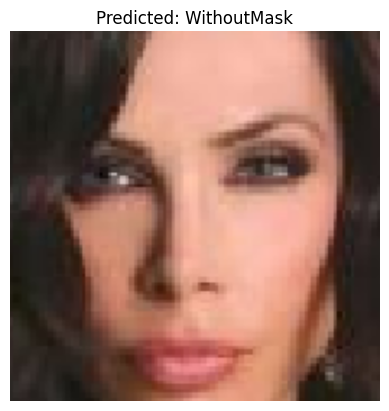

In [61]:
predict_img(test_dir+"/WithoutMask/5924.png")